In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### The dataset consists of 2 regions which are:

#### 1. Bejaia region located in the northeast of Algeria.
#### 2. Sidi Bel-abbes region located in the northwest of Algeria.

#### Each of the above regions have 122 datapoints each. So let's load the dataset properly.

## Load the dataset

In [84]:
df = pd.read_csv(filepath_or_buffer="./data/Algerian_forest_fires_dataset.csv", skiprows=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [85]:
beijaia_df = df[:122]
sidi_df = df[124:]

## Filtering out the Beijaia region with added Region

In [86]:
beijaia_df.loc[:, "region"] = "Beijaia"
beijaia_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Beijaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Beijaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Beijaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Beijaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Beijaia


## Filtering out the Sidi Bel-abbes region with added Region

In [87]:
sidi_df.loc[:,"region"] = "Sidi Bel-abbes"
sidi_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,Sidi Bel-abbes
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,Sidi Bel-abbes
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,Sidi Bel-abbes
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,Sidi Bel-abbes
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,Sidi Bel-abbes


## Forming a final Dataframe

In [88]:
final_df = pd.concat(objs=[beijaia_df, sidi_df], axis=0)
final_df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Beijaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Beijaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Beijaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Beijaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Beijaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


In [89]:
headers = list(final_df.columns)
for i in range(len(headers)):
    headers[i] = str(headers[i]).strip()
final_df.columns = headers

## Saving the final Dataframe to a csv file for later usage

In [90]:
final_df.to_csv("./data/Algerian Forest Fire Dataset Cleaned", index=False)

In [91]:
df = pd.read_csv("./data/Algerian Forest Fire Dataset Cleaned")
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Beijaia
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,Beijaia
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Beijaia
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,Beijaia
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,Beijaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi Bel-abbes
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi Bel-abbes
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi Bel-abbes
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi Bel-abbes


## Getting the shape of data frame

In [92]:
df.shape

(244, 15)

### There are 244 datapoints and 14 Feature variables and 1 target variable.

## Let's get some info on the dataset

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 28.7+ KB


**We can observe from the information of the Dataframe that none of the columns contain any null values which can also be confirmed by the below operation:**

In [94]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

#### Although the information about the dataframe showed that all the columns are non-null but the target column "Classes" has a single datapoint with a null value. Let's find out which datapoint is having a null value.

In [95]:
df[df["Classes"].isna()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi Bel-abbes


### There is only target variable called "Class". Let's find out how many unique values its has.

In [96]:
df["Classes"].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

#### The target column has only 2 unique values but they are not formatted properly, hence showing different unique values. Let's fix this for all the columns with has "object" datatype.

In [97]:
obj_classes = df.select_dtypes(include=["object"])
df[obj_classes.columns] = obj_classes.apply(lambda x : x.str.strip())

In [98]:
# let's check the values once again
df["Classes"].unique()

array(['not fire', 'fire', nan], dtype=object)

### Let's checkout if there are any duplicates or not.

In [99]:
df.duplicated().sum()

0

#### So there are no duplicate values and it's a positive news.

## Let's explore a bit on the year present in the dataset

In [100]:
df["year"].unique()

array([2012], dtype=int64)

#### So there is only one year present. The whole dataset is from the year 2012. Since the year values is same in all the columns, we can drop it off as it will no longer be an important parrameter for our model

In [101]:
df.drop(labels=["year"], axis=1, inplace=True)
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### Let's find out the correlation between the numerical columns of the dataset

In [102]:
spearman_corr = df.corr(method="spearman")
spearman_corr

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
day,1.000000,0.000000,0.120953,-0.088238,0.069784,-0.170031,0.249665,0.502511,0.236154,0.517089
month,0.000000,1.000000,-0.036416,-0.027159,-0.062515,-0.036135,0.051935,0.007518,0.035286,0.023095
Temperature,0.120953,-0.036416,1.000000,-0.646969,-0.215653,-0.287747,0.667245,0.609695,0.651472,0.580684
RH,-0.088238,-0.027159,-0.646969,1.000000,0.192412,0.174980,-0.667352,-0.503904,-0.647585,-0.463042
Ws,0.069784,-0.062515,-0.215653,0.192412,1.000000,0.013503,-0.062182,0.002131,0.038723,0.024685
Rain,-0.170031,-0.036135,-0.287747,0.174980,0.013503,1.000000,-0.736529,-0.558120,-0.730227,-0.576472
FFMC,0.249665,0.051935,0.667245,-0.667352,-0.062182,-0.736529,1.000000,0.821220,0.988872,0.803619
DMC,0.502511,0.007518,0.609695,-0.503904,0.002131,-0.558120,0.821220,1.000000,0.820026,0.987742
ISI,0.236154,0.035286,0.651472,-0.647585,0.038723,-0.730227,0.988872,0.820026,1.000000,0.804873
BUI,0.517089,0.023095,0.580684,-0.463042,0.024685,-0.576472,0.803619,0.987742,0.804873,1.000000


#### Since it is very difficult to understand from these numbers which columns are more correlated with others, let's plot a heatmap with the correlation matrix

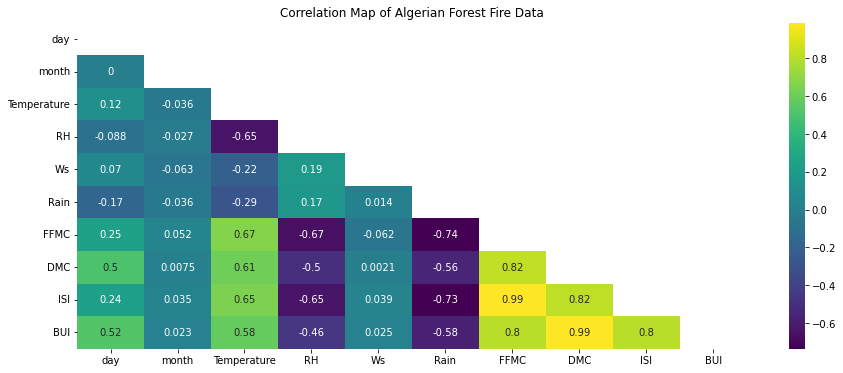

In [103]:
mask = np.triu(np.ones(spearman_corr.shape))
plt.figure(figsize=(15,6))
sns.heatmap(spearman_corr, annot=True, cmap="viridis", mask=mask)
plt.title("Correlation Map of Algerian Forest Fire Data")
plt.show()

#### If the features are correlated,then they can be removed as they don't contribute much towards model training. It is clear that correlated features means that they bring the same information, so it is logical to remove one of them. So, let's drop the features which have a correlation greater than 0.90

In [104]:
upper_matrix = spearman_corr.where(np.triu(np.ones(spearman_corr.shape), k=1).astype(np.bool))
upper_matrix

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
day,NaN,0.0,0.120953,-0.088238,0.069784,-0.170031,0.249665,0.502511,0.236154,0.517089
month,NaN,NaN,-0.036416,-0.027159,-0.062515,-0.036135,0.051935,0.007518,0.035286,0.023095
Temperature,NaN,NaN,NaN,-0.646969,-0.215653,-0.287747,0.667245,0.609695,0.651472,0.580684
RH,NaN,NaN,NaN,NaN,0.192412,0.174980,-0.667352,-0.503904,-0.647585,-0.463042
Ws,NaN,NaN,NaN,NaN,NaN,0.013503,-0.062182,0.002131,0.038723,0.024685
Rain,NaN,NaN,NaN,NaN,NaN,NaN,-0.736529,-0.558120,-0.730227,-0.576472
FFMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.821220,0.988872,0.803619
DMC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.820026,0.987742
ISI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.804873
BUI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
corrFutures = [column for column in upper_matrix.columns if any(abs(upper_matrix[column]) > 0.90)]
corrFutures

['ISI', 'BUI']

#### So these two features - "ISI" and "BUI" - are highly correlated with some columns in the dataset. Since, they are highly correlated, we can drop these features and take other feature columns for our consideration and model training.

In [106]:
new_df = df.drop(labels=['ISI', 'BUI'], axis=1)
new_df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,FWI,Classes,region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,0.5,not fire,Beijaia
1,2,6,29,61,13,1.3,64.4,4.1,7.6,0.4,not fire,Beijaia
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.1,not fire,Beijaia
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0,not fire,Beijaia
4,5,6,27,77,16,0.0,64.8,3.0,14.2,0.5,not fire,Beijaia


## Let's verify if the dataset is imbalanced or not based on the target variable "Classes"

In [107]:
df["Classes"].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

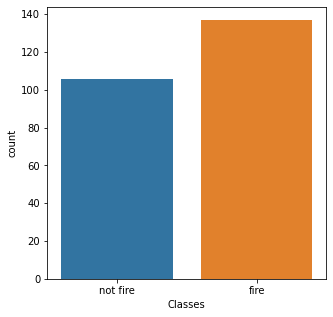

In [108]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x= "Classes")
plt.show()

#### We can conclude from the above visualization that the dataset is not imbalanced.

## Let's find out which region has the largest no of cases for forest fire

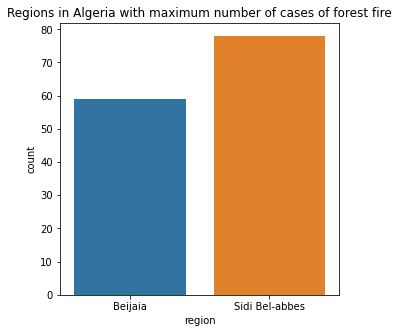

In [109]:
fire_values = df[df["Classes"]=="fire"]
plt.figure(figsize=(5,5))
sns.countplot(data=fire_values, x="region")
plt.title("Regions in Algeria with maximum number of cases of forest fire")
plt.show()

## Let's see the description of the numerical columns in the dataframe  

In [110]:
df.describe()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754
std,8.825059,1.112961,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824
min,1.000000,6.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000
25%,8.000000,7.000000,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000
50%,16.000000,7.500000,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000
75%,23.000000,8.000000,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000
max,31.000000,9.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000


#### So the temperature from the different regions concluding to forest fire range between 22 to 42 which we can also observe in some plain lands without forests as well. This means, that the maximum temperature range is highly prone to cause disaster.

## Let's have a look at the boxplot of the dataset before and after standardization

#### But let's first encode the categorical columns using Label Encoding as of now

In [112]:
cat_features = df.columns[df.dtypes =="object"]
cat_features

Index(['DC', 'FWI', 'Classes', 'region'], dtype='object')

In [123]:
from sklearn.preprocessing import LabelEncoder

for cat in cat_features:
    encoder = LabelEncoder()
    encoder.fit(df[cat])
    df[cat] = encoder.transform(np.array(df[cat]).ravel()).ravel()

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
new_df = pd.DataFrame(scaler.transform(df), columns=df.columns)
new_df

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,-1.675278,-1.350526,-0.874735,-0.332478,0.889990,-0.381223,-0.851801,-0.913365,0.808363,-0.833786,-0.935740,-1.046060,1.103978,-1.0
1,-1.561731,-1.350526,-0.874735,-0.063185,-0.892913,0.270307,-0.942658,-0.856651,0.808363,-0.905784,-0.900468,-1.070355,1.103978,-1.0
2,-1.448185,-1.350526,-1.702005,1.350607,2.316313,6.184192,-2.151758,-0.986283,0.738617,-1.073781,-0.985120,-1.143238,1.103978,-1.0
3,-1.334638,-1.350526,-1.977761,1.821872,-0.892913,0.871719,-3.444727,-1.083506,0.564253,-1.145779,-1.055663,-1.167533,1.103978,-1.0
4,-1.221091,-1.350526,-1.426248,1.013990,0.176829,-0.381223,-0.914702,-0.945773,-1.493241,-0.857785,-0.900468,-1.046060,1.103978,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1.163387,1.350526,-0.598979,0.206109,-0.536333,-0.381223,0.525036,0.107484,0.145780,-0.065802,0.016595,1.407691,-0.876688,1.0
240,1.276934,1.350526,-1.150492,1.687225,-0.179752,1.823955,-2.571100,-0.662204,1.052472,-1.121780,-0.738219,-1.167533,1.103978,1.0
241,1.390481,1.350526,-1.426248,1.687225,4.812379,-0.130635,-2.235627,-0.905263,0.860672,-1.049781,-0.935740,-1.118944,1.103978,1.0
242,1.504027,1.350526,-2.253517,-0.534449,0.889990,-0.331105,0.126662,-0.840447,-1.371186,-0.737788,-0.815816,-0.997471,1.103978,1.0


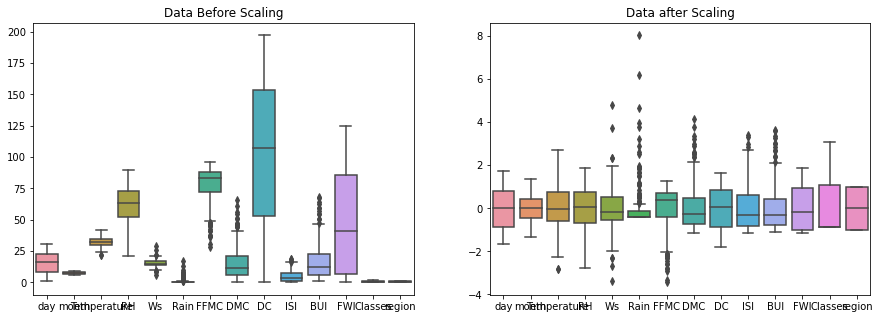

In [133]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df)
plt.title("Data Before Scaling")

plt.subplot(1,2,2)
sns.boxplot(new_df)
plt.title("Data after Scaling")
plt.show()